<a href="https://colab.research.google.com/github/A1ienSword/Pattern-recognition-labs/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_5_%D0%9A%D0%BE%D1%81%D1%82%D0%B8%D1%86%D1%8B%D0%BD_%D0%92%D0%92_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5. Метод k-средних.
1. Написать программу, реализующую кластеризацию объектов, заданных признаковым
описанием, на основании метода k-средних (k-means).
2. Продемонстрировать работу программы на подготовленном наборе данных.
3. Функция, реализующая алгоритм k-средних, должна быть реализована студентом
самостоятельно. Допускается использование готовых примитивов из стандартных
или сторонних библиотек для выполнения базовых (в т.ч. векторизованных) операций
(сложение, умножение, возведение в степень, вычисление среднего значения и т.п.).
4. Требования к набору данных: не менее 30 объектов, не менее 2 и не более 5 классов,
не менее 3 и не более 7 атрибутов у объекта. Можно взять предложенные наборы
данных «Ирисы» либо «Фрукты и овощи».
5. При выполнении задания рекомендуется использовать язык программирования Python
или среду Octave.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Загрузка данных
data = pd.read_csv('iris.csv.gz')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [3]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
def k_means(X, n_clusters=3, max_iter=300, tol=1e-4):
    """
    Реализация алгоритма k-средних

    Параметры:
    X - нормализованные данные
    n_clusters - количество кластеров
    max_iter - максимальное количество итераций
    tol - допустимое изменение для остановки
    """
    # Инициализация центроидов случайными точками
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    for _ in range(max_iter):
        # Назначение кластеров
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Обновление центроидов
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Проверка сходимости
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels

In [5]:
# Применение алгоритма
n_clusters = 3
centroids, cluster_labels = k_means(X_scaled, n_clusters=n_clusters)
# Вывод координат центроидов
print("Центроиды кластеров:")
for i, centroid in enumerate(centroids):
    print(f"Кластер {i+1}: {np.round(centroid, 2)}")

Центроиды кластеров:
Кластер 1: [-0.01 -0.87  0.38  0.31]
Кластер 2: [-1.01  0.84 -1.3  -1.26]
Кластер 3: [1.17 0.15 1.   1.03]


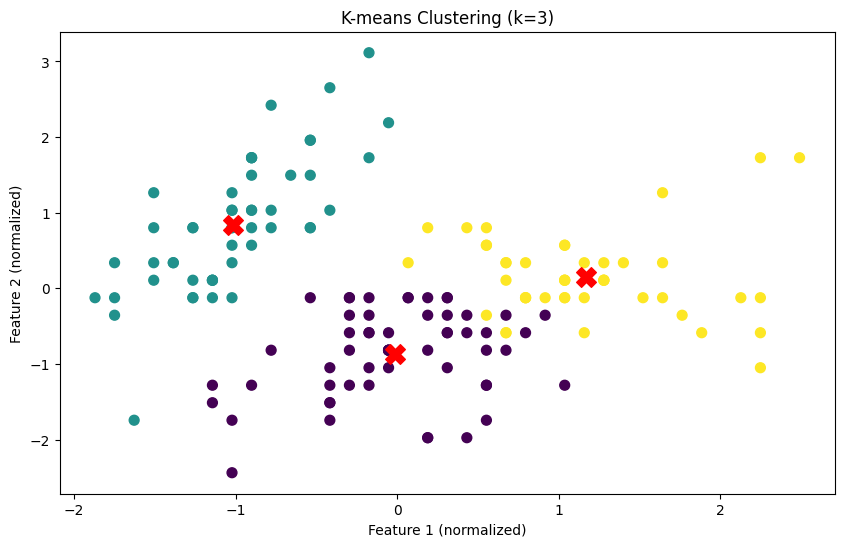

In [6]:
# Визуализация (для первых двух признаков)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='X', c='red')
plt.title(f'K-means Clustering (k={n_clusters})')
plt.xlabel('Feature 1 (normalized)')
plt.ylabel('Feature 2 (normalized)')
plt.show()